## Wine clustering

In [77]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [78]:
X=wine['data']
y=wine['target']

In [79]:
X.shape, y.shape

((178, 13), (178,))

In [80]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [81]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## K-means clustering

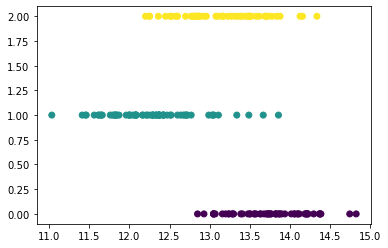

In [82]:
plt.scatter(X[:,0], y, c=y)

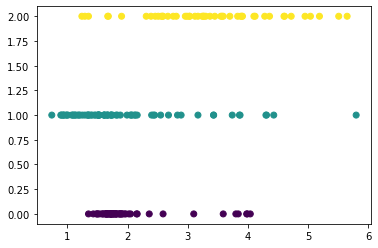

In [83]:
plt.scatter(X[:,1], y, c=y)

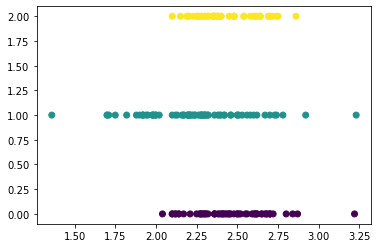

In [84]:
plt.scatter(X[:,2], y, c=y)

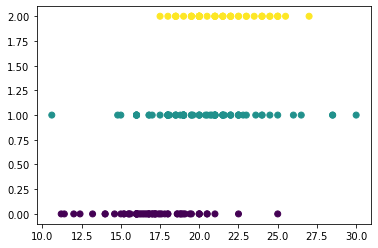

In [85]:
plt.scatter(X[:,3], y, c=y)

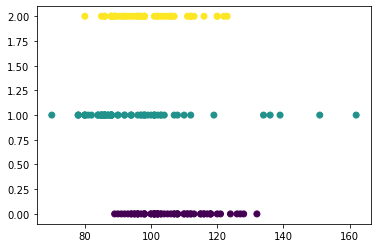

In [86]:
plt.scatter(X[:,4], y, c=y)

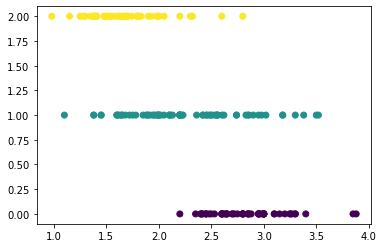

In [87]:
plt.scatter(X[:,5], y, c=y) #좋은 반비례 관계를 나타내고 있다.

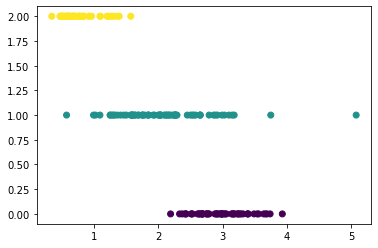

In [88]:
plt.scatter(X[:,6], y, c=y)

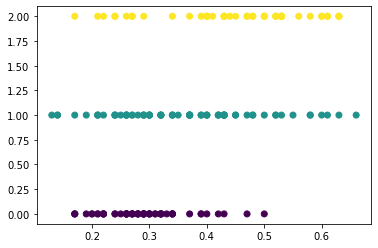

In [89]:
plt.scatter(X[:,7], y, c=y)

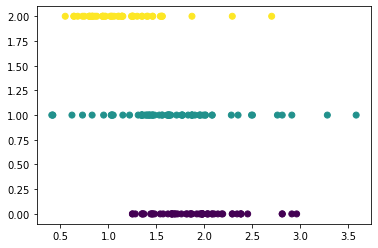

In [90]:
plt.scatter(X[:,8], y, c=y)

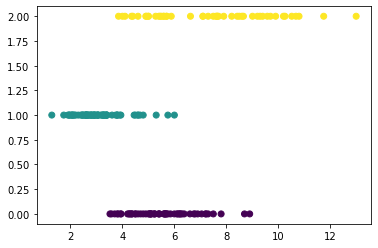

In [91]:
plt.scatter(X[:,9], y, c=y)

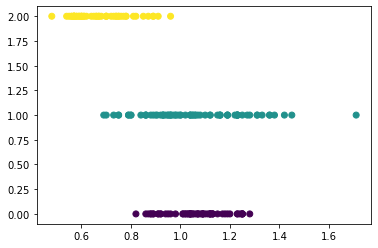

In [92]:
plt.scatter(X[:,10], y, c=y)

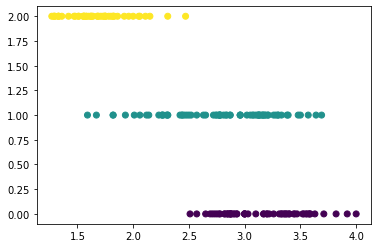

In [93]:
plt.scatter(X[:,11], y, c=y) #좋은 반비례 관계를 나타내고 있다.

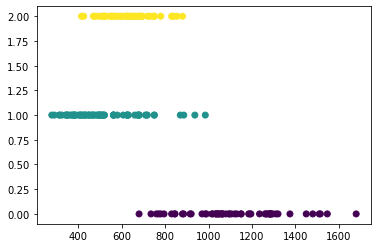

In [94]:
plt.scatter(X[:,12], y, c=y) 

#### X[:,5]와 X[:,6]  데이터에서 가장 선형적인 특징을 보이고 있어서, 이 데이터를 기준으로 그래프를 다시 그려보겠습니다.

#### 즉, Total phenols와 Flavanoids 기준으로 다시 그려 보겠습니다.

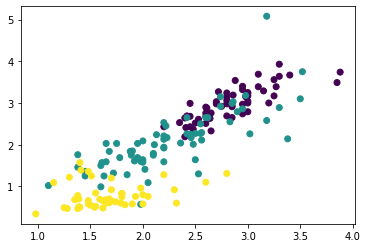

In [95]:
plt.scatter(X[:,5], X[:,6], c=y)

In [96]:
from sklearn.cluster import KMeans

In [97]:
kmeans = KMeans(n_clusters = 3)
Xi = [X[:,5], X[:,6]]
data_1 = np.transpose(Xi)
kmeans.fit(data_1)

KMeans(n_clusters=3)

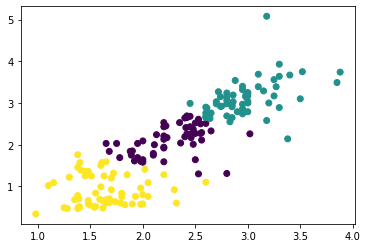

In [98]:
plt.scatter(X[:,5], X[:,6], c=kmeans.labels_)

k-means clustering은 중심점을 기준으로 비슷한 위치에서 클러스터링 해주기 때문에, wine clustering에서는 적합하지 않는 clustering인 것 같습니다.

## GMM clustering (각 클러스터들의 가우시안 분포에 속할 확률과 분산을 이용한 clustering)

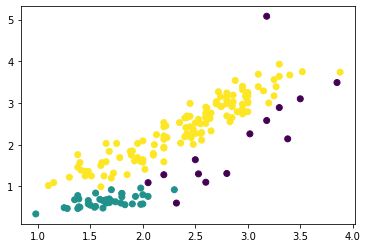

In [99]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data_1)
labels_1 = gmm.predict(data_1)
plt.scatter(X[:,5], X[:,6], c=labels_1)

## BIRCH clustering (cf tree를 이용한 clustering)

In [100]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters=3, threshold=0.2)

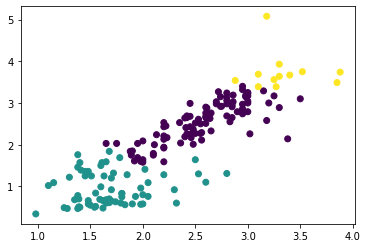

In [101]:
brc.fit(data_1)
labels_2 = brc.predict(data_1)
plt.scatter(X[:,5], X[:,6], c=labels_2)

## Agglomerative Clustering(병합 군집)

In [102]:
from sklearn.cluster import AgglomerativeClustering

In [103]:
agg = AgglomerativeClustering(n_clusters=3)
labels_3 = agg.fit_predict(data_1)

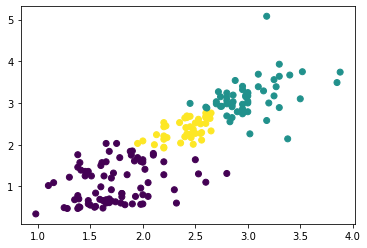

In [104]:
plt.scatter(X[:,5], X[:,6], c=labels_3)

## ※1차 결론

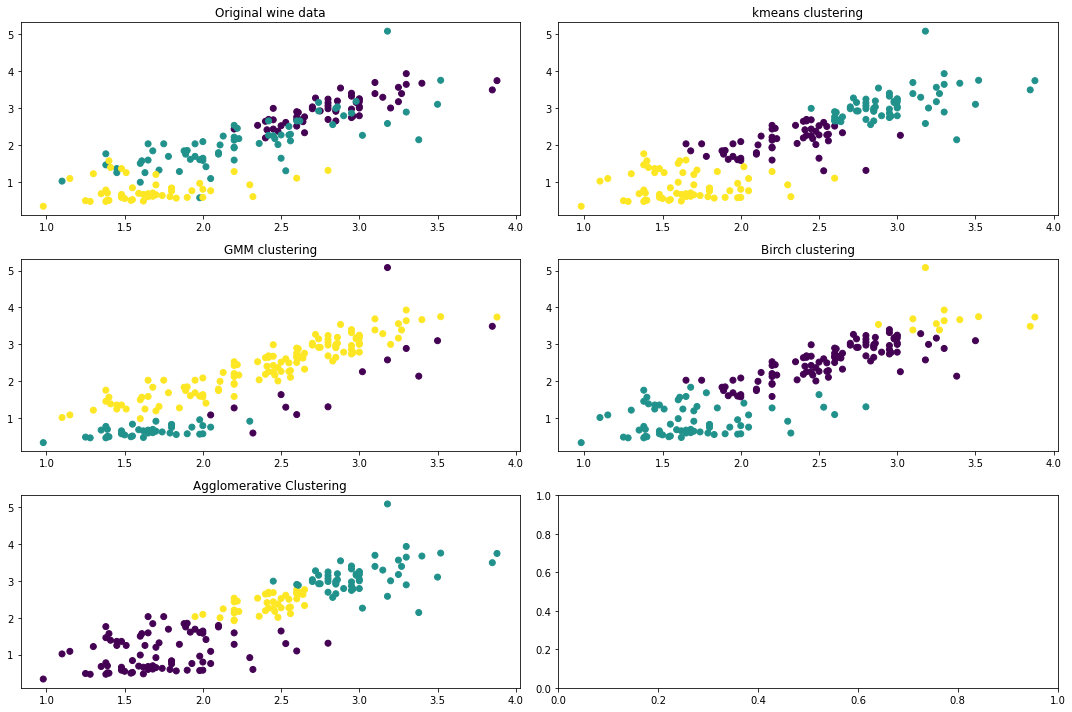

In [105]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

ax[0, 0].scatter(X[:,5], X[:,6], c=y)
ax[0, 1].scatter(X[:,5], X[:,6], c=kmeans.labels_)
ax[1, 0].scatter(X[:,5], X[:,6], c=labels_1)
ax[1, 1].scatter(X[:,5], X[:,6], c=labels_2)
ax[2, 0].scatter(X[:,5], X[:,6], c=labels_3)

ax[0, 0].set_title("Original wine data")
ax[0, 1].set_title("kmeans clustering")
ax[1, 0].set_title("GMM clustering")
ax[1, 1].set_title("Birch clustering")
ax[2, 0].set_title("Agglomerative Clustering")

fig.tight_layout()
plt.show()

In [106]:
target=wine.target

In [108]:
k_means_target = kmeans.predict(data_1)
gmm_target=gmm.predict(data_1)
brc_target=brc.predict(data_1)
agg_target=agg.fit_predict(data_1)

In [110]:
from sklearn.metrics.cluster import adjusted_rand_score

score_k_means = adjusted_rand_score(target, k_means_target)
score_gmm = adjusted_rand_score(target, gmm_target)
score_brc = adjusted_rand_score(target, brc_target)
score_agg = adjusted_rand_score(target, agg_target)

In [111]:
score_k_means, score_gmm, score_brc, score_agg

(0.40983998953597023,
 0.31528590726919326,
 0.35026973638847314,
 0.30831992306428524)

### Raw data로 clustering한 것은 너무 낮은 정확도로 실패한 것으로 결론 내렸습니다. 데이터를 preprocessing하고 PCA한 후 Clustering 해보겠습니다.

## Preproceccing and PCA

In [112]:
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = wine.feature_names)

X_scaled.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
75,-1.656018,-0.409647,-1.632171,-1.049479,-0.192495,-1.097777,-0.461091,-0.176095,-0.772492,-0.544212,1.195772,-0.666229,-1.015514
141,0.443932,0.200764,-0.060375,0.151661,-0.754202,-1.434267,-1.535336,0.065639,-1.666055,0.234414,-1.129518,-0.200123,0.105428
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
52,1.012154,-0.526343,0.195499,-1.650049,0.790492,2.539515,1.717516,-0.337251,0.489009,0.861641,0.230557,0.915707,1.411071
87,-1.668371,-0.598156,0.926567,1.953371,-0.824415,-0.601054,-0.420933,0.307374,-0.439596,-1.063296,1.766126,0.845085,-0.588791


In [113]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [114]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
80,0.762064,3.375054
38,1.502195,0.769432
136,-3.915754,-0.154583
48,2.009851,-1.247029
18,3.541985,-2.518344


In [115]:
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['class'] = y # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,class
30,2.500220,-1.240834,0,0
90,-1.349285,2.118001,1,1
143,-2.375195,-0.482334,2,2
156,-2.889826,-1.925219,2,2
89,-0.555723,2.657540,1,1


In [116]:
import matplotlib as mpl
def plotData(df, groupby):

    fig, ax = plt.subplots(figsize = (7,7))

    cmap = mpl.cm.get_cmap('prism')

    
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), 
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

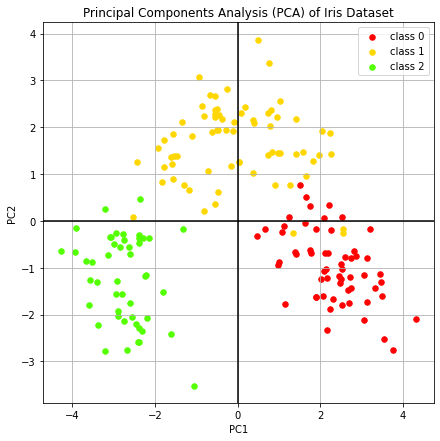

In [117]:
plotData(df_plot, 'class') #original data (전치리와 PCA를 한 후 첫 번째 그래프)

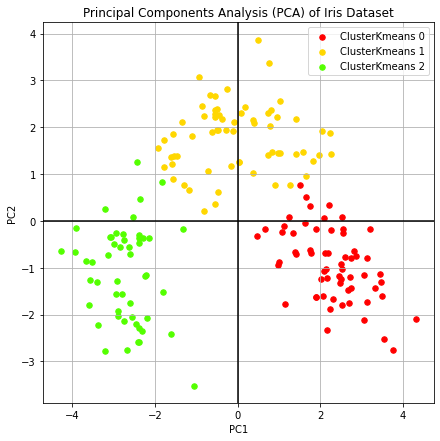

In [118]:
plotData(df_plot, 'ClusterKmeans')

In [119]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

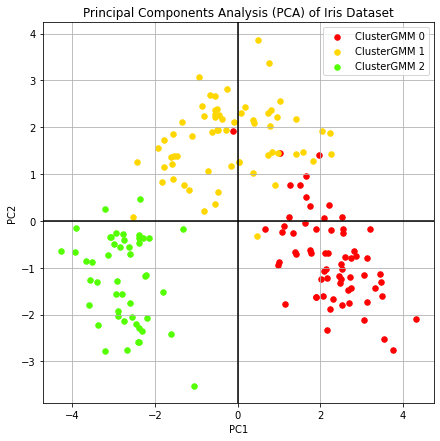

In [120]:
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [121]:
brc.fit(X_scaled)
y_cluster_brc = brc.predict(X_scaled)
y_cluster_brc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

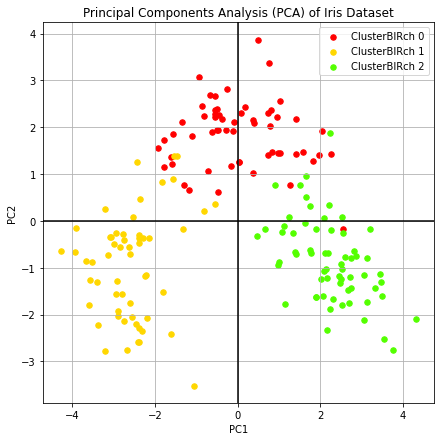

In [122]:
df_plot['ClusterBIRch'] = y_cluster_brc
plotData(df_plot, 'ClusterBIRch')

In [123]:
agg.fit_predict(X_scaled)

y_cluster_agg = agg.fit_predict(X_scaled)
y_cluster_agg

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

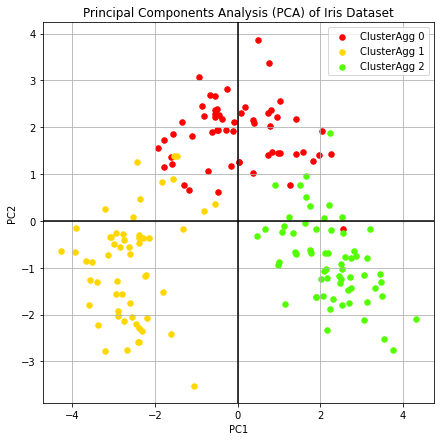

In [124]:
df_plot['ClusterAgg'] = y_cluster_agg
plotData(df_plot, 'ClusterAgg')

## ※최종 결론

In [128]:
score_k_means_ = adjusted_rand_score(y, y_cluster_kmeans)
score_gmm_ = adjusted_rand_score(y, y_cluster_gmm)
score_brc_ = adjusted_rand_score(y, y_cluster_brc)
score_agg_ = adjusted_rand_score(y, y_cluster_agg)

In [129]:
score_k_means_, score_gmm_, score_brc_, score_agg_

(0.8974949815093207,
 0.8452681277002906,
 0.7899332213582837,
 0.7899332213582837)

### 전처리와 PCA를 통해 데이터 정렬을 한 후 클러스팅을 하면, 좀 더 나은 정확도를 나타낼 수 있습니다. 정확도 순은 k-means clustering, GMM clustering, BIRCH clustering, Agglomerative Clustering 순이었습니다.